# Supervised approach to Tri Health Data

In [1]:
import pandas as pd

df = pd.read_csv('tri_health_data.csv')
df.head(5)

,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,HRV,Steps,Cals_burnt,Cals,Carbs,Fats,Protein,Sensation
0,22/05/2017,7.1,"Swim, Run",125.0,154,87.7,NaN,13894.0,4600.0,3600.0,481.0,102.0,135.0,7.0
1,23/05/2017,6.3,Swim,45.0,78,NaN,NaN,12739.0,3459.0,3700.0,413.0,100.0,75.0,4.0
2,24/05/2017,6.7,NaN,NaN,0,NaN,NaN,3324.0,2629.0,2210.0,305.0,42.0,75.0,8.0
3,25/05/2017,7.6,"Swim, Gym",142.0,155,NaN,NaN,11532.0,4327.0,4580.0,392.0,89.0,175.0,7.0
4,26/05/2017,8.7,Run,68.0,60,NaN,NaN,10479.0,3363.0,3590.0,510.0,61.0,80.0,9.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Preprocessing
# a) Handling missing data
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Activity Type']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

df_processed = pd.DataFrame(preprocessor.fit_transform(df))
df_processed

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.475489,1.377669,1.730363,1.670645e-01,3.383976e-15,1.226772,1.772120,0.648493,4.227662,7.031407e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.413542,-0.821392,0.226904,-1.285926e-14,3.383976e-15,0.891228,0.177155,0.773137,1.639297,6.628461e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.944515,0.000000,-1.316120,-1.285926e-14,3.383976e-15,-1.843958,-0.983074,-1.084057,-2.471634,-5.056972e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.110794,1.844969,1.750145,-1.285926e-14,3.383976e-15,0.540578,1.390502,1.870003,0.839950,4.412258e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.400616,-0.189162,-0.129178,-1.285926e-14,3.383976e-15,0.234667,0.042960,0.636028,5.331523,-1.228985e+00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,0.579820,-0.409068,-0.129178,-1.285926e-14,3.383976e-15,0.528377,0.114251,0.212239,0.000000,-2.863103e-15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1030,0.697076,-0.409068,0.009298,-1.285926e-14,3.383976e-15,0.389221,0.101670,-0.261408,0.000000,-2.863103e-15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1031,-1.061772,0.000000,-1.316120,-1.285926e-14,3.383976e-15,-0.928550,-1.735126,-1.607562,0.000000,-2.863103e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1032,1.048846,-0.409068,0.029080,2.791246e+00,3.383976e-15,0.558881,0.294575,0.872852,0.000000,-2.863103e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


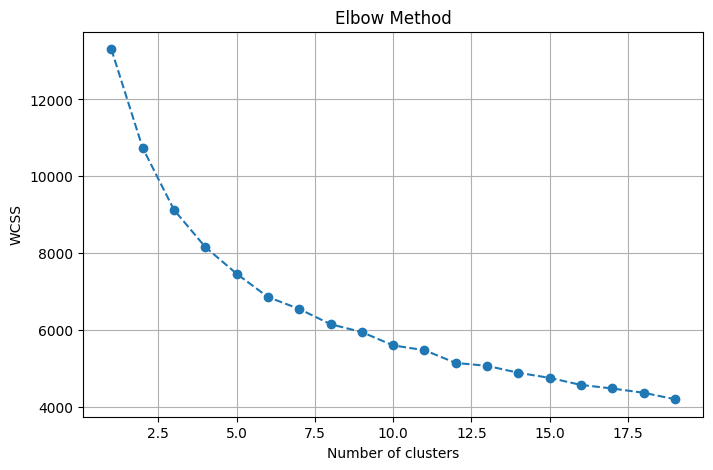

In [36]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_processed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [38]:
from sklearn.metrics import silhouette_score

silhouette_score(df_processed, kmeans.labels_)

0.15197787237950589

In [42]:
kmeans.labels_

array([14, 14,  5, ...,  0, 13, 15], dtype=int32)

# Classification of overtraining 

## Learning if over training without the cost of HRV tech

# following Le Wagon method

<AxesSubplot:>

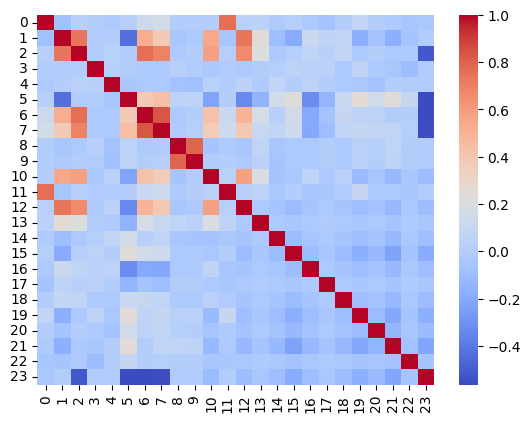

In [8]:
import seaborn as sns

sns.heatmap(pd.DataFrame(df_processed).corr(), cmap='coolwarm')

In [9]:
## Comput Picincpal Components 

In [10]:
df_processedWG = df_processed

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_processedWG)

PCA()

In [20]:
X_proj = pca.transform(df_processedWG)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 25)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,3.416669,3.129262,7.122464,2.073278,0.617317,0.882258,1.738196,-1.121729,0.063782,-1.533915,...,0.216593,0.127608,0.247297,0.096104,0.240963,-0.203215,0.053884,0.067620,-0.202357,2.910118e-16
1,-0.191650,2.415104,5.753655,-0.340521,0.339477,0.726319,0.262226,-1.138925,-0.502479,-3.319095,...,-0.155336,-0.128216,0.003361,-0.212713,0.108055,-0.000720,-0.090535,0.009564,0.070447,5.199953e-16
2,-1.846332,-3.640479,-4.309140,-0.360721,-0.423044,-0.701682,-0.383560,-0.337978,-0.150775,2.072369,...,-0.293650,-0.054156,-0.090194,-0.168812,0.168104,-0.058574,-0.038974,0.001041,-0.059858,-2.849164e-16
3,4.928179,0.784801,3.493779,1.782641,0.137041,0.465032,3.352783,-0.685717,-0.620799,-2.000080,...,-0.168787,0.633638,0.041355,0.333313,-0.057125,-0.316213,0.247351,0.011589,-0.302148,6.310176e-16
4,0.138382,2.657511,1.452080,1.492218,0.325713,0.319845,-0.357180,1.751131,0.182354,4.245343,...,0.401933,0.207566,-0.049846,0.239884,-0.169716,-0.038020,0.061172,-0.010015,-0.119215,-8.400279e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,-0.067440,1.428278,-0.873108,0.320751,0.049929,0.034650,-0.155742,-0.694211,-0.003587,0.191694,...,0.053620,0.055372,-0.026561,0.041453,-0.060232,-0.018912,0.000891,-0.015893,-0.017855,-2.849164e-16
1030,-0.277094,0.914639,-0.538712,0.138522,0.047558,0.012369,-0.188194,-0.017733,0.003204,-0.062717,...,0.028554,0.075949,0.032806,-0.038031,-0.031171,-0.038822,0.006774,-0.019140,-0.033042,-2.849164e-16
1031,-2.497920,-1.631301,0.531489,0.647385,-0.117582,-0.070387,0.250161,-0.480025,-0.307752,0.215448,...,0.267181,0.200834,0.218463,-0.038654,0.079821,0.016403,-0.053232,0.008296,0.060308,-6.287175e-17
1032,0.442835,1.560218,-0.817090,0.136752,2.373426,-1.432300,0.113496,0.036913,0.530096,-0.043998,...,-0.041566,-0.017727,-0.063817,-0.009634,0.053908,0.024909,0.012834,0.004923,-0.015756,9.672281e-17


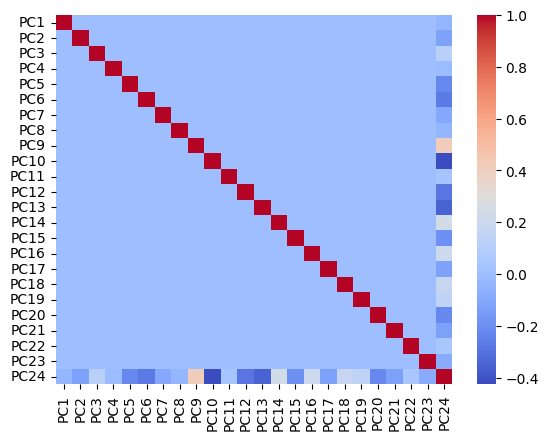

In [21]:
sns.heatmap(X_proj.corr(), cmap='coolwarm');

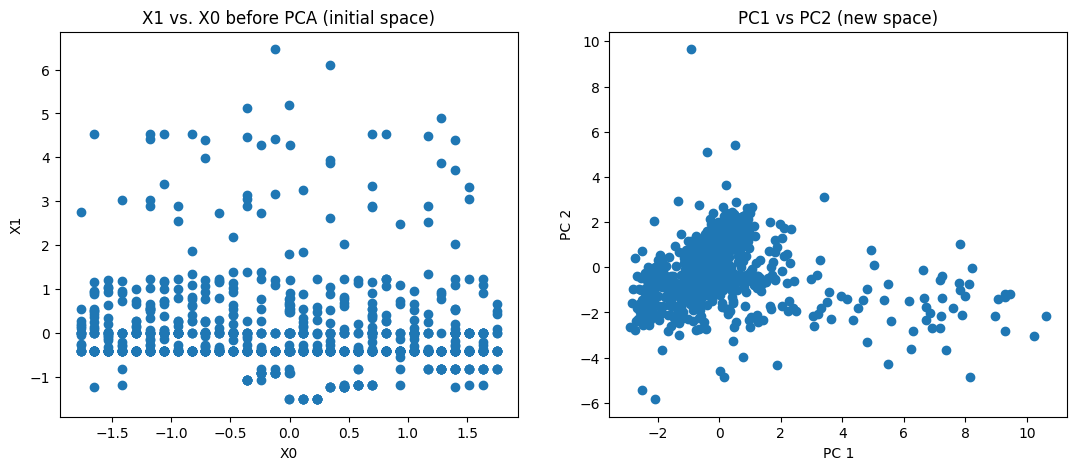

In [22]:
# 2D-slice

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(df_processedWG.iloc[:,0], df_processedWG.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

In [23]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=3)
km.fit(X_proj)

KMeans(n_clusters=3)

In [24]:
# The 3 centroids' coordinates (expressed in the space of PCs)
km.cluster_centers_.shape

(3, 24)

In [25]:
# The 177 observations are classified automatically
km.labels_

array([2, 1, 0, ..., 0, 1, 0], dtype=int32)

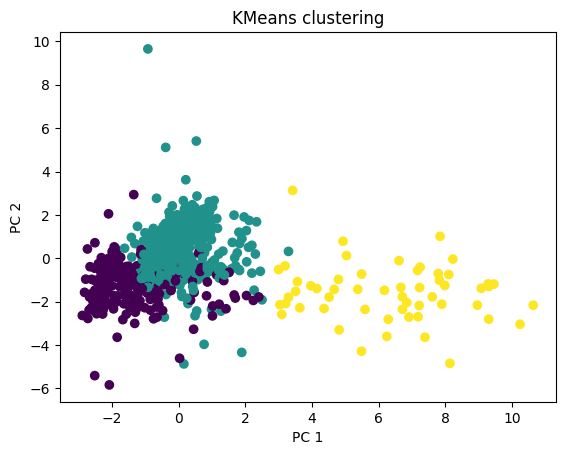

In [26]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

NameError: name 'y' is not defined

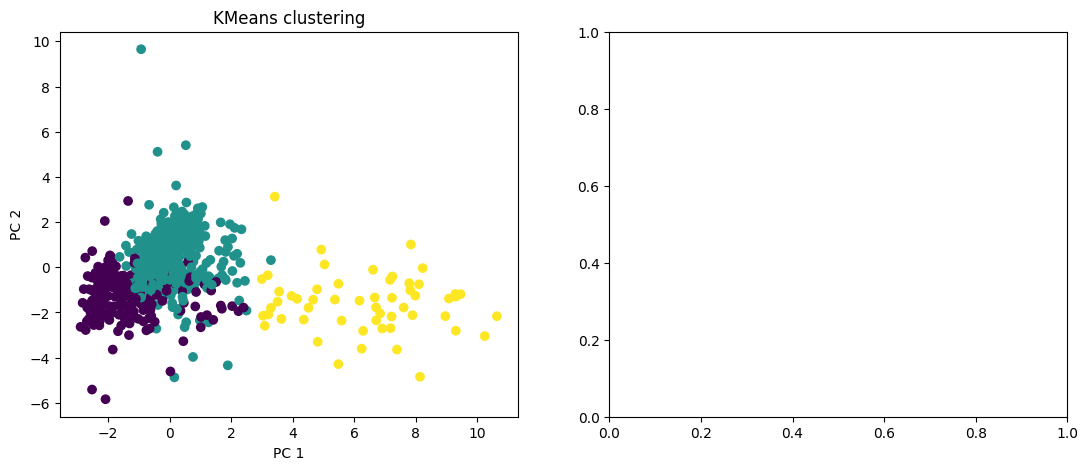

In [27]:
# Visualization
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

plt.subplot(1,2,2)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=y)
plt.title('True wine labels'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

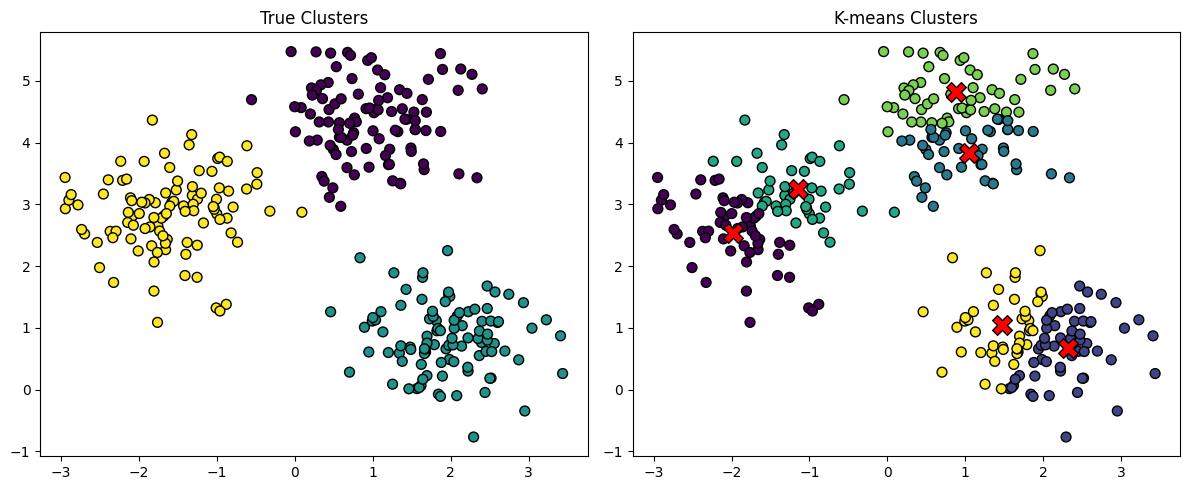

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic dataset with 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Use K-means to cluster the data
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(X)

# Visualize the true clusters and the clusters identified by K-means
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# True clusters
ax[0].scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis', edgecolor='k')
ax[0].set_title('True Clusters')

# Clusters identified by K-means
ax[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')
ax[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', edgecolor='k')
ax[1].set_title('K-means Clusters')

plt.tight_layout()
plt.show()
